# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [39]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

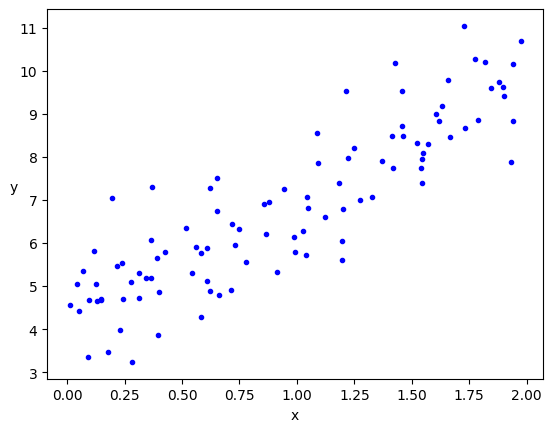

In [40]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [41]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [59]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, y_pred.shape[0]))  # Dynamic shape based on number of parameters

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [43]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

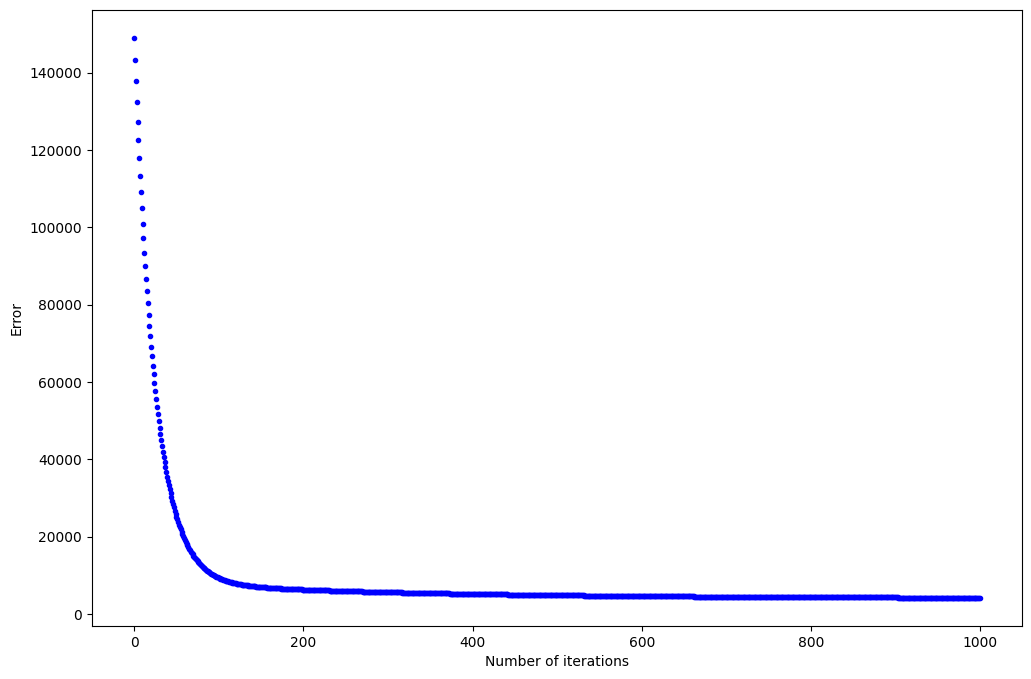

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

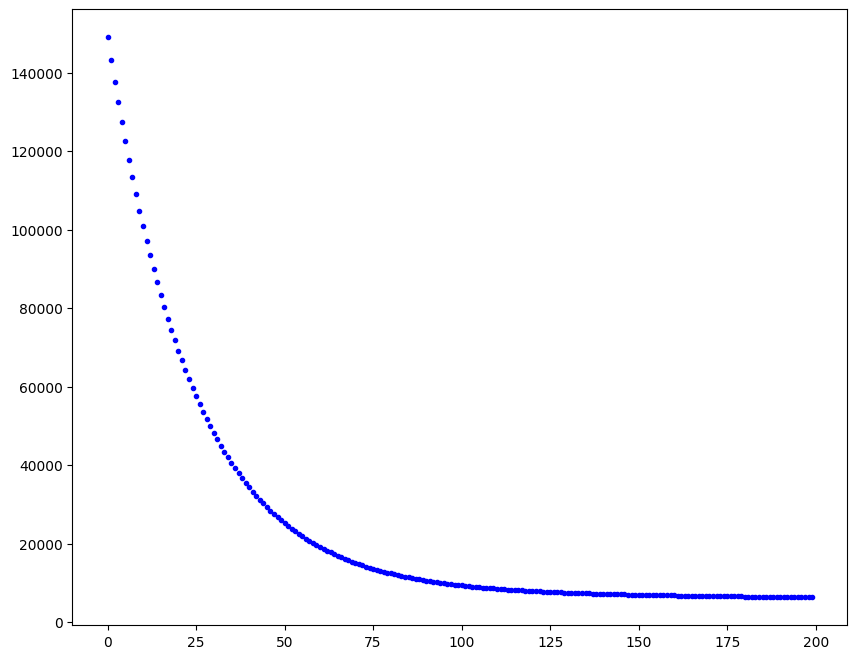

In [45]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [46]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [47]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


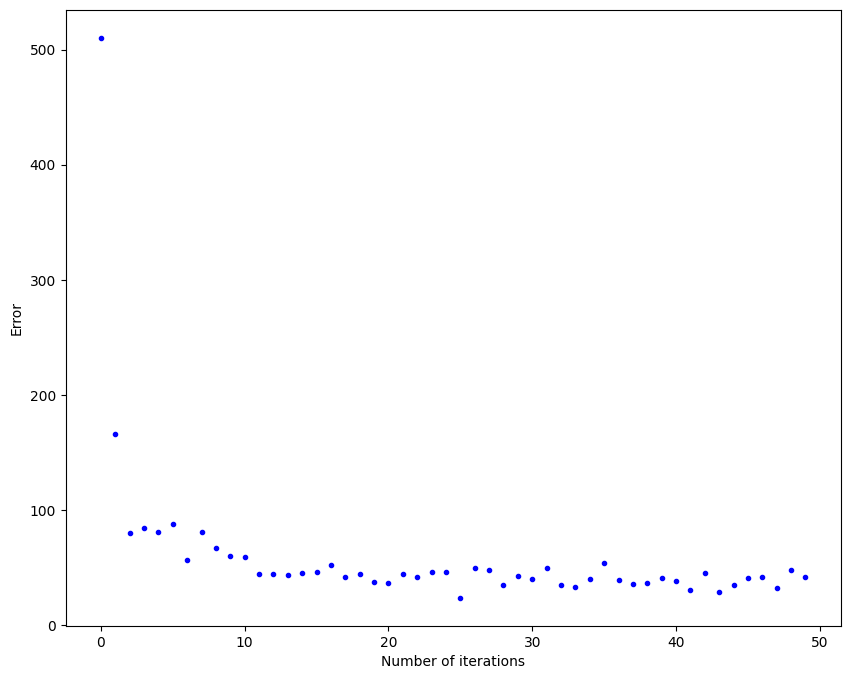

In [48]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [49]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [50]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


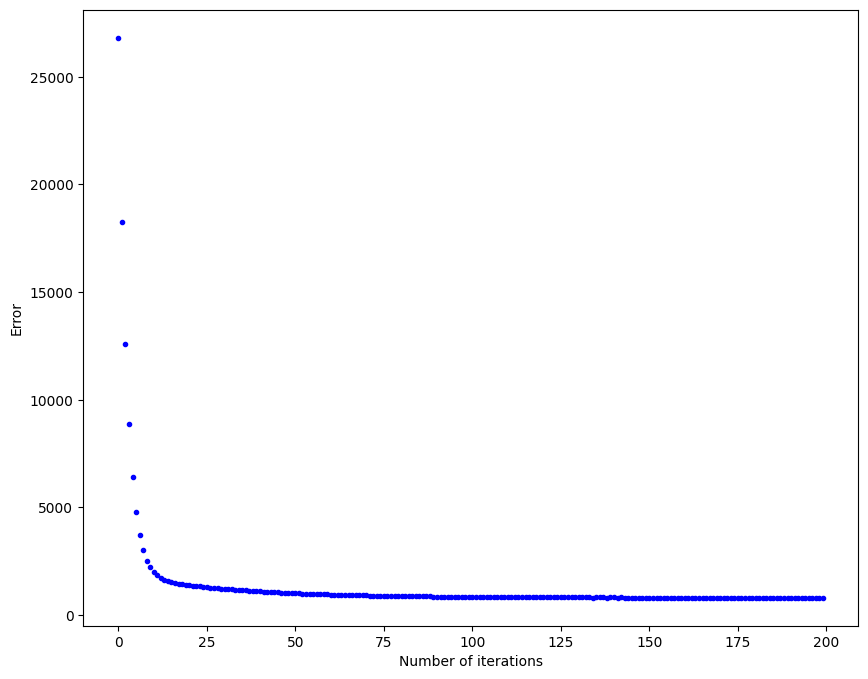

In [51]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

# Implementing "Things to try out"



## 1. Change batch size in mini-batch gradient descent



Batch Size 5: Final y_pred = [4.193, 2.787], Final Cost = 201.393
Batch Size 10: Final y_pred = [4.187, 2.797], Final Cost = 402.949
Batch Size 20: Final y_pred = [4.154, 2.825], Final Cost = 806.943
Batch Size 50: Final y_pred = [4.190, 2.790], Final Cost = 2016.085


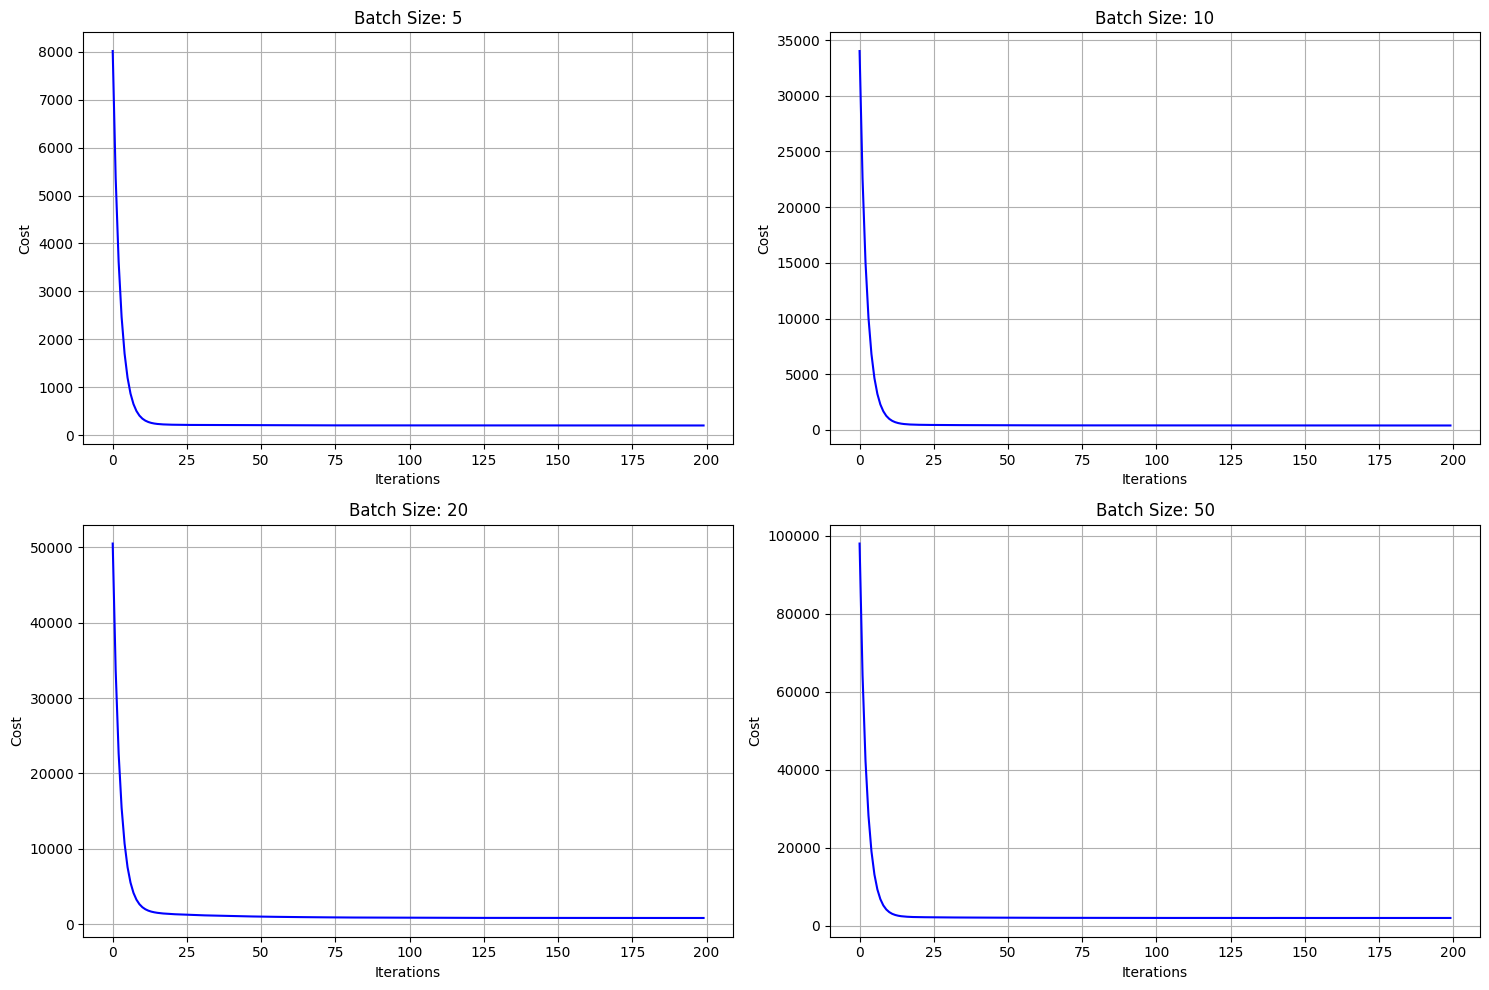

In [52]:
# Test different batch sizes
batch_sizes = [5, 10, 20, 50]
lr = 0.1
n_iter = 200

plt.figure(figsize=(15, 10))

for i, batch_size in enumerate(batch_sizes):
    y_pred = np.random.randn(2, 1)
    y_pred_final, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)
    
    plt.subplot(2, 2, i+1)
    plt.plot(range(n_iter), cost_history, 'b-')
    plt.title(f'Batch Size: {batch_size}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    
    print(f'Batch Size {batch_size}: Final y_pred = [{y_pred_final[0][0]:.3f}, {y_pred_final[1][0]:.3f}], Final Cost = {cost_history[-1]:.3f}')

plt.tight_layout()
plt.show()

## 2. Test all three methods on a real dataset



In [53]:
# Load and prepare the car evaluation dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('car_evaluation.csv')
print("Dataset shape:", df.shape)
print("First few rows:")
print(df.head())

# For regression, let's create a numerical target from the car price categories
# We'll encode categorical variables
le = LabelEncoder()

# Encode all categorical columns
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Use all features except the last column as X, and last column as y
X_real = df.iloc[:, :-1].values
y_real = df.iloc[:, -1].values.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")

Dataset shape: (1727, 7)
First few rows:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
Training set shape: X_train (1381, 6), y_train (1381, 1)
Test set shape: X_test (346, 6), y_test (346, 1)


Testing all three gradient descent methods on car evaluation dataset:

Batch GD - Final Cost: 653289.272943
Stochastic GD - Final Cost: 873.767805
Mini-batch GD - Final Cost: 15059.780446


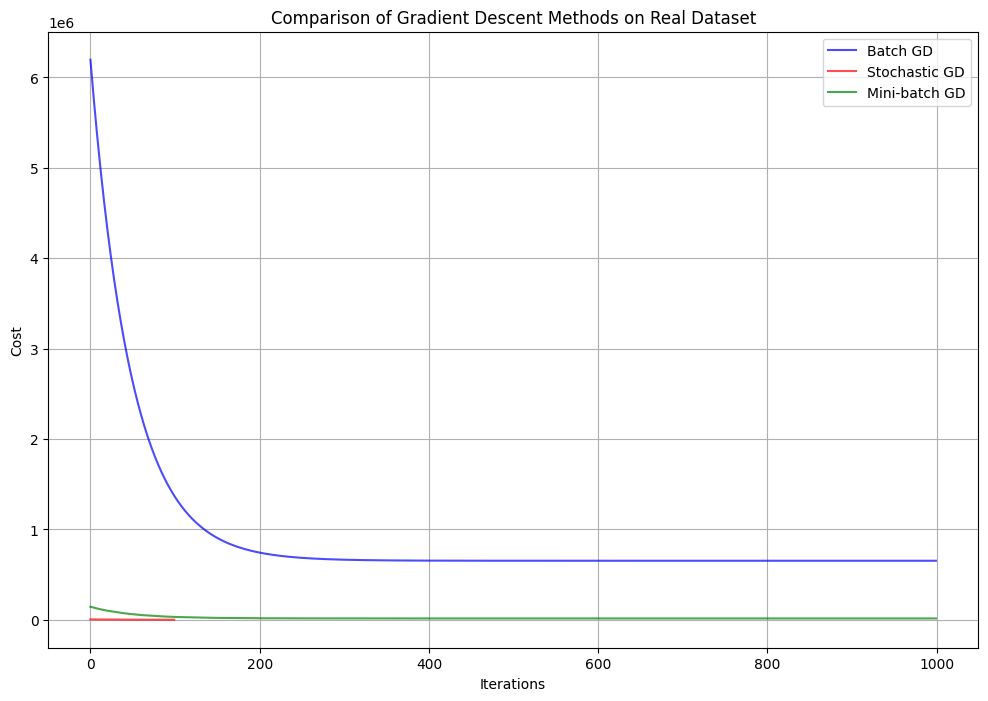

In [60]:
# Test all three gradient descent methods on real data
# Add bias term to X_train
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]

# Initialize parameters
lr = 0.01
n_iter = 1000
initial_theta = np.random.randn(X_train_b.shape[1], 1)

print("Testing all three gradient descent methods on car evaluation dataset:\n")

# 1. Batch Gradient Descent
theta_batch = initial_theta.copy()
theta_batch, cost_history_batch, _ = gradient_descent(X_train_b, y_train, theta_batch, lr, n_iter)
print(f"Batch GD - Final Cost: {cost_history_batch[-1]:.6f}")

# 2. Stochastic Gradient Descent
theta_sgd = initial_theta.copy()
theta_sgd, cost_history_sgd = stocashtic_gradient_descent(X_train_b, y_train, theta_sgd, lr, 100)  # Fewer iterations for SGD
print(f"Stochastic GD - Final Cost: {cost_history_sgd[-1]:.6f}")

# 3. Mini-batch Gradient Descent
theta_minibatch = initial_theta.copy()
theta_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_train, y_train, theta_minibatch, lr, n_iter, batch_size=32)
print(f"Mini-batch GD - Final Cost: {cost_history_minibatch[-1]:.6f}")

# Plot comparison
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_history_batch)), cost_history_batch, 'b-', label='Batch GD', alpha=0.7)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, 'r-', label='Stochastic GD', alpha=0.7)
plt.plot(range(len(cost_history_minibatch)), cost_history_minibatch, 'g-', label='Mini-batch GD', alpha=0.7)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Gradient Descent Methods on Real Dataset')
plt.legend()
plt.grid(True)
plt.show()

## 3. Compare effects of changing learning rate by the same amount




Learning Rate: 0.001
  Batch GD: Final Cost = 55655.554127
  Stochastic GD: Final Cost = 1936.051684
  Mini-batch GD: Final Cost = 6560.182751

Learning Rate: 0.01
  Batch GD: Final Cost = 4270.912872
  Stochastic GD: Final Cost = 340.173229
  Mini-batch GD: Final Cost = 819.899383

Learning Rate: 0.1
  Batch GD: Final Cost = 4032.922868
  Stochastic GD: Final Cost = 43.283683
  Mini-batch GD: Final Cost = 805.051728

Learning Rate: 0.5
  Batch GD: Final Cost = 4032.922820
  Stochastic GD: Final Cost = 41.865526
  Mini-batch GD: Final Cost = 797.249681


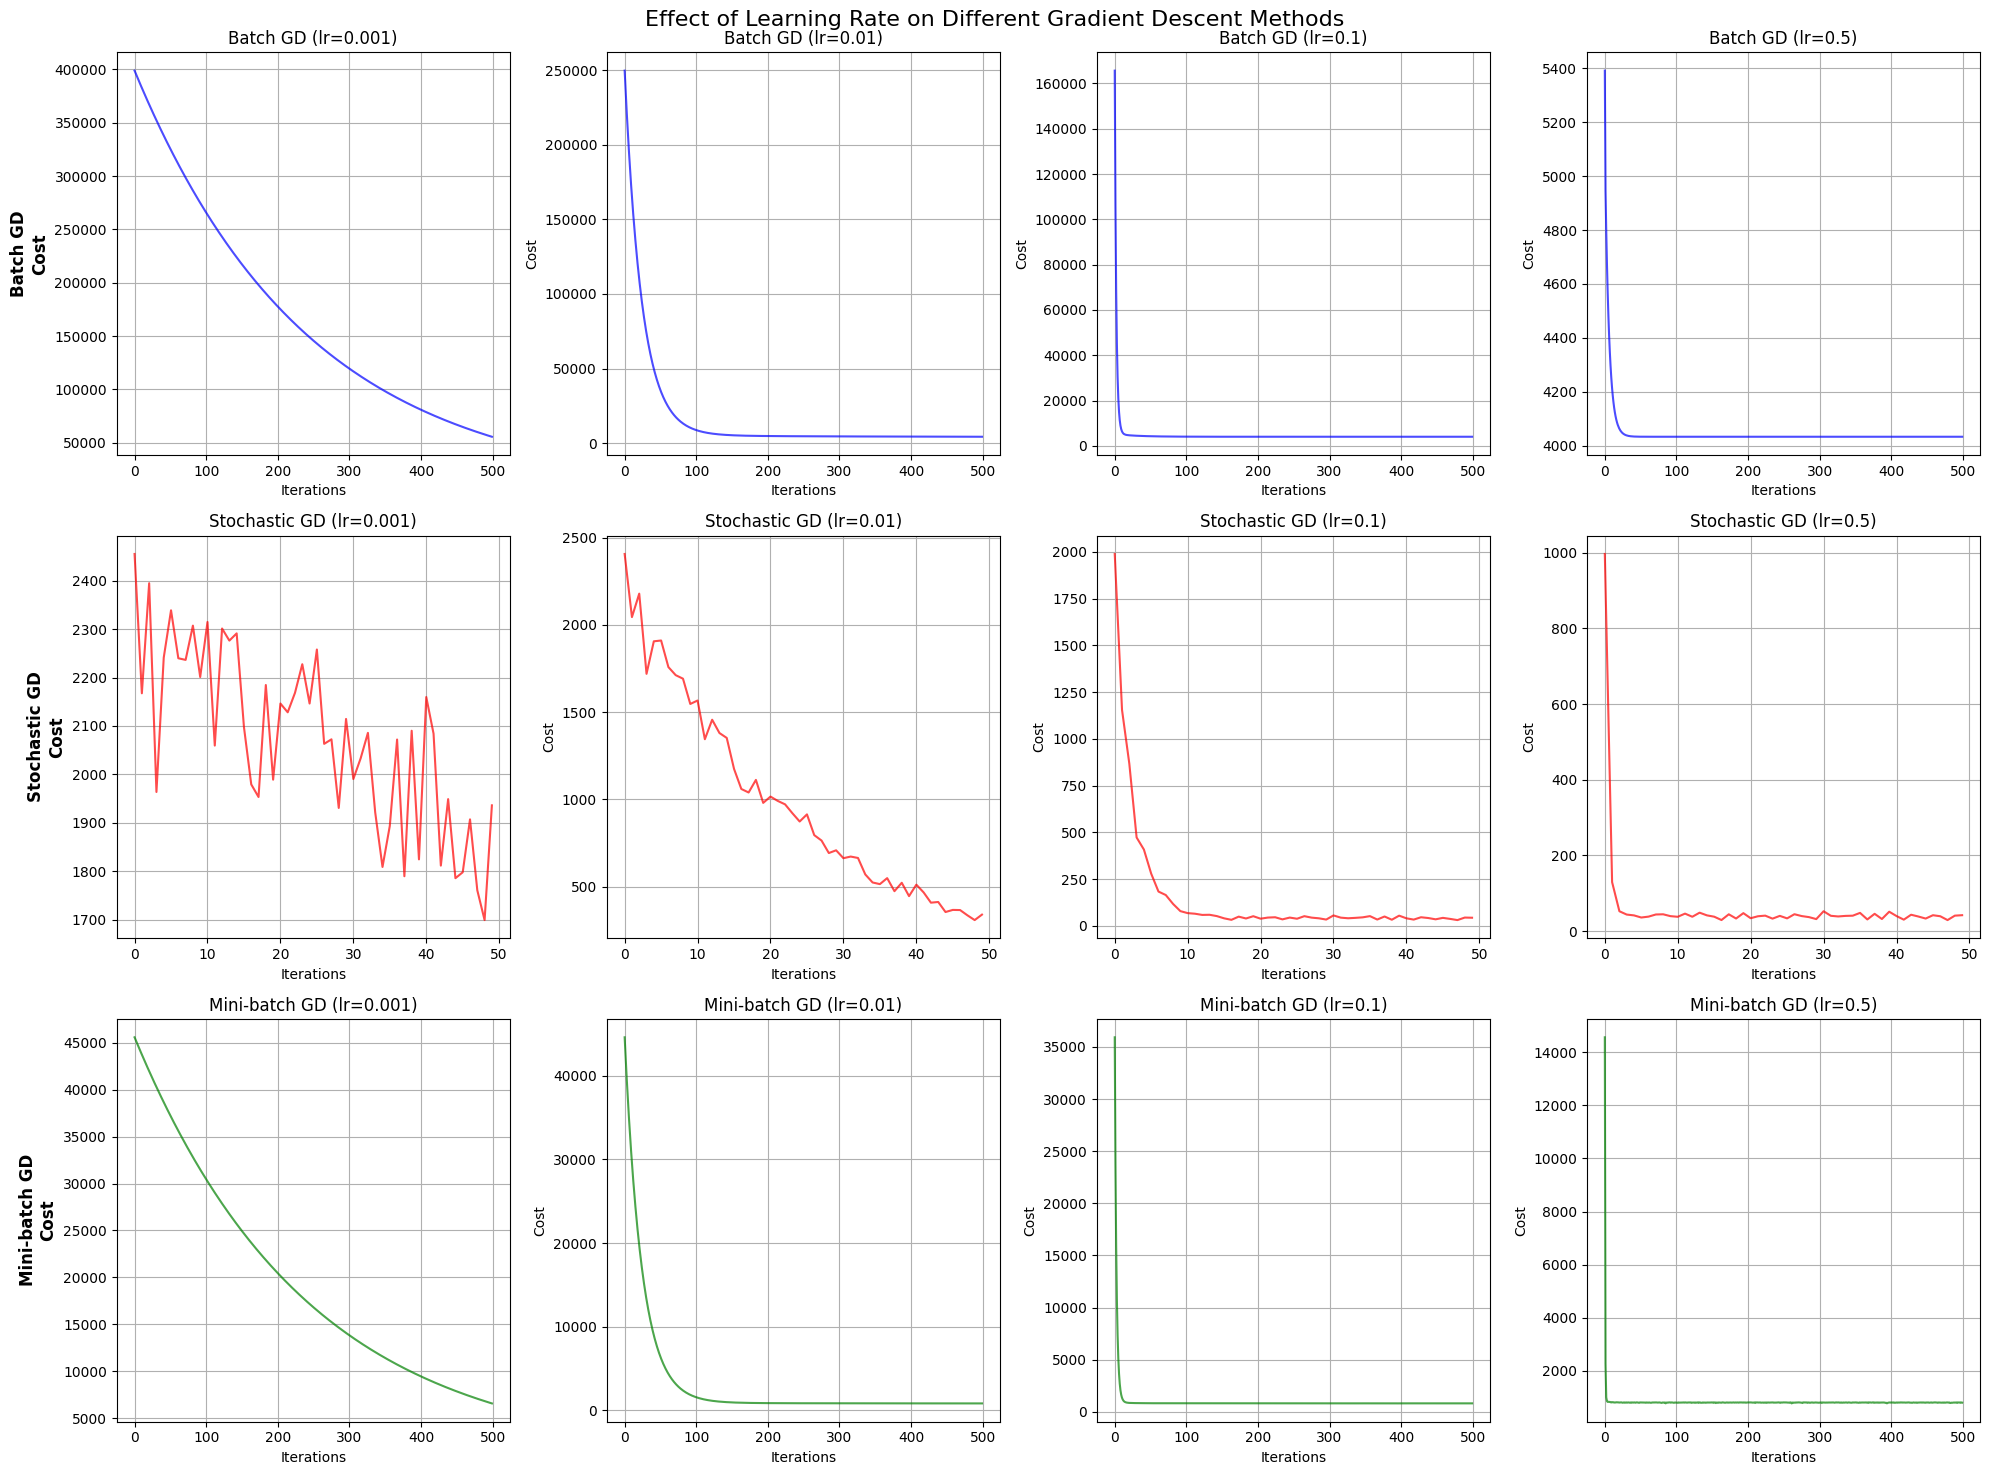

In [55]:
# Compare learning rate effects across all three methods using our original synthetic data
learning_rates = [0.001, 0.01, 0.1, 0.5]
n_iter = 500

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Effect of Learning Rate on Different Gradient Descent Methods', fontsize=16)

methods = ['Batch GD', 'Stochastic GD', 'Mini-batch GD']

for i, lr in enumerate(learning_rates):
    print(f"\nLearning Rate: {lr}")
    
    # Batch Gradient Descent
    y_pred_batch = np.random.randn(2, 1)
    np.random.seed(42)  # For reproducibility
    X_b = np.c_[np.ones((len(X), 1)), X]
    y_pred_batch, cost_history_batch, _ = gradient_descent(X_b, y, y_pred_batch, lr, n_iter)
    
    axes[0, i].plot(range(n_iter), cost_history_batch, 'b-', alpha=0.7)
    axes[0, i].set_title(f'Batch GD (lr={lr})')
    axes[0, i].set_xlabel('Iterations')
    axes[0, i].set_ylabel('Cost')
    axes[0, i].grid(True)
    print(f"  Batch GD: Final Cost = {cost_history_batch[-1]:.6f}")
    
    # Stochastic Gradient Descent
    y_pred_sgd = np.random.randn(2, 1)
    np.random.seed(42)
    y_pred_sgd, cost_history_sgd = stocashtic_gradient_descent(X_b, y, y_pred_sgd, lr, 50)
    
    axes[1, i].plot(range(len(cost_history_sgd)), cost_history_sgd, 'r-', alpha=0.7)
    axes[1, i].set_title(f'Stochastic GD (lr={lr})')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Cost')
    axes[1, i].grid(True)
    print(f"  Stochastic GD: Final Cost = {cost_history_sgd[-1]:.6f}")
    
    # Mini-batch Gradient Descent
    y_pred_mini = np.random.randn(2, 1)
    np.random.seed(42)
    y_pred_mini, cost_history_mini = minibatch_gradient_descent(X, y, y_pred_mini, lr, n_iter, batch_size=20)
    
    axes[2, i].plot(range(n_iter), cost_history_mini, 'g-', alpha=0.7)
    axes[2, i].set_title(f'Mini-batch GD (lr={lr})')
    axes[2, i].set_xlabel('Iterations')
    axes[2, i].set_ylabel('Cost')
    axes[2, i].grid(True)
    print(f"  Mini-batch GD: Final Cost = {cost_history_mini[-1]:.6f}")

# Add method labels on the left
for i, method in enumerate(methods):
    axes[i, 0].set_ylabel(f'{method}\nCost', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

---

**Answer: (iii) is correct.**

**Explanation:** For convex loss functions with optimal learning rate, Batch GD deterministically converges to the global optimum due to its use of the full dataset at each step. SGD, however, introduces randomness by using single samples, causing oscillations around the optimum but not exact convergence to it. The noise in SGD prevents it from settling precisely at the minimum.

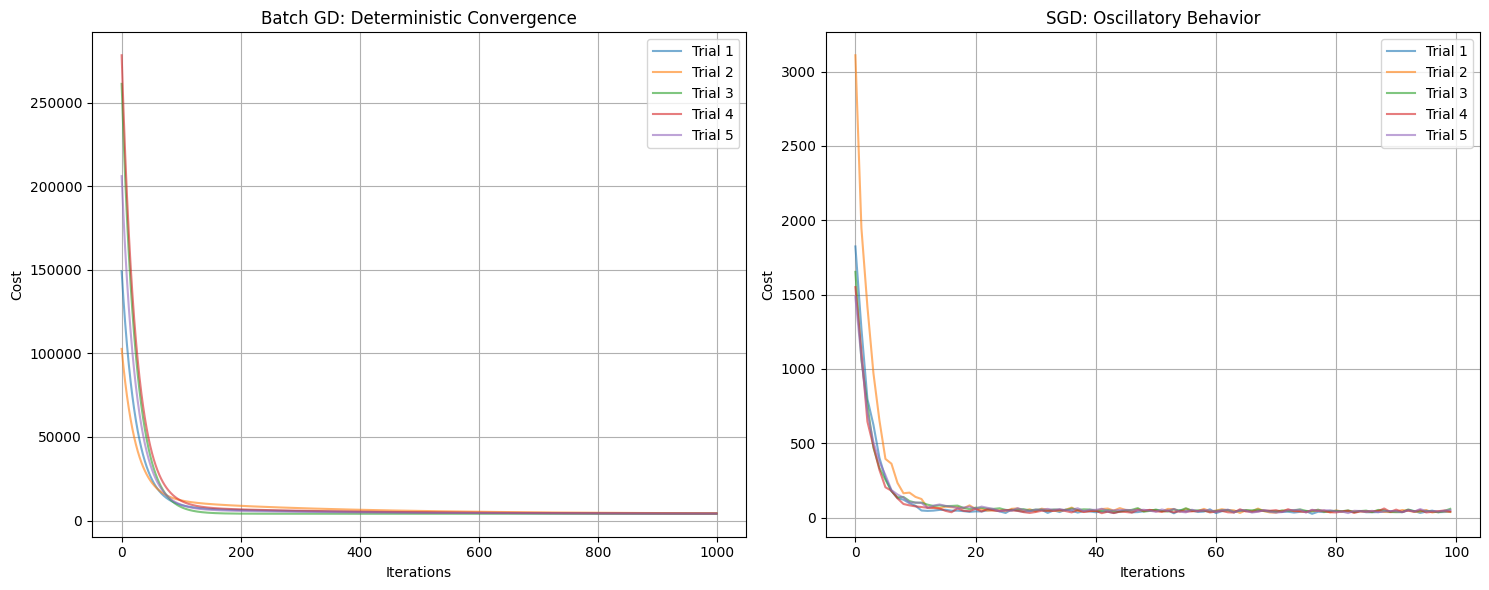

Notice: Batch GD curves converge to similar final costs, while SGD shows more variation and oscillation.


In [56]:
# Demonstration: Convergence behavior for convex loss function
np.random.seed(42)
X_demo = 2 * np.random.rand(100, 1)
y_demo = 4 + 3 * X_demo + np.random.randn(100, 1)
X_demo_b = np.c_[np.ones((len(X_demo), 1)), X_demo]

# Run multiple trials to show the difference
n_trials = 5
lr = 0.01
n_iter = 1000

plt.figure(figsize=(15, 6))

# Batch GD - Multiple runs should converge to same point
plt.subplot(1, 2, 1)
for trial in range(n_trials):
    y_pred = np.random.randn(2, 1)
    y_pred_final, cost_history, _ = gradient_descent(X_demo_b, y_demo, y_pred, lr, n_iter)
    plt.plot(range(n_iter), cost_history, alpha=0.6, label=f'Trial {trial+1}')

plt.title('Batch GD: Deterministic Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# SGD - Multiple runs show oscillatory behavior
plt.subplot(1, 2, 2)
for trial in range(n_trials):
    y_pred = np.random.randn(2, 1)
    y_pred_final, cost_history = stocashtic_gradient_descent(X_demo_b, y_demo, y_pred, lr*10, 100)  # Higher LR for visibility
    plt.plot(range(len(cost_history)), cost_history, alpha=0.6, label=f'Trial {trial+1}')

plt.title('SGD: Oscillatory Behavior')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Notice: Batch GD curves converge to similar final costs, while SGD shows more variation and oscillation.")